In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
file_path ='resources/def_mid_fielders.csv'
def_mid_fielders_df = pd.read_csv(file_path)
def_mid_fielders_df['rating'] = (def_mid_fielders_df['potential'].astype(int) + def_mid_fielders_df['overall'].astype(int))/2
def_mid_fielders_df['rating'] = def_mid_fielders_df['rating'].apply(np.int64)
def_mid_fielders_df

,overall,potential,field_position,height,weight,crossing,finishing,heading_accuracy,short_passing,volleys,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,89,90,LDM,5'6,159lbs,68,65,54,86,56,...,85,90,91,85,15,12,10,7,10,89
1,89,89,CDM,6'2,168lbs,62,67,68,89,44,...,90,90,86,80,5,8,13,9,13,89
2,88,90,CDM,6'1,185lbs,52,59,76,85,53,...,84,88,90,87,13,14,16,12,12,89
3,87,91,RDM,6'4,185lbs,80,73,73,86,85,...,87,66,70,68,5,6,2,4,3,89
4,86,86,CDM,5'10,159lbs,80,60,60,89,72,...,86,75,74,70,7,7,13,7,8,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,49,66,CDM,6'0,154lbs,32,28,40,53,33,...,37,62,40,49,8,12,8,12,5,57
1435,48,58,LDM,6'0,159lbs,52,29,41,50,30,...,39,52,40,49,8,15,11,8,5,53
1436,48,63,CDM,5'7,132lbs,38,39,40,53,25,...,44,46,45,46,6,8,12,13,8,55
1437,48,65,CDM,5'10,165lbs,35,33,44,55,27,...,38,44,42,46,9,15,15,8,6,56


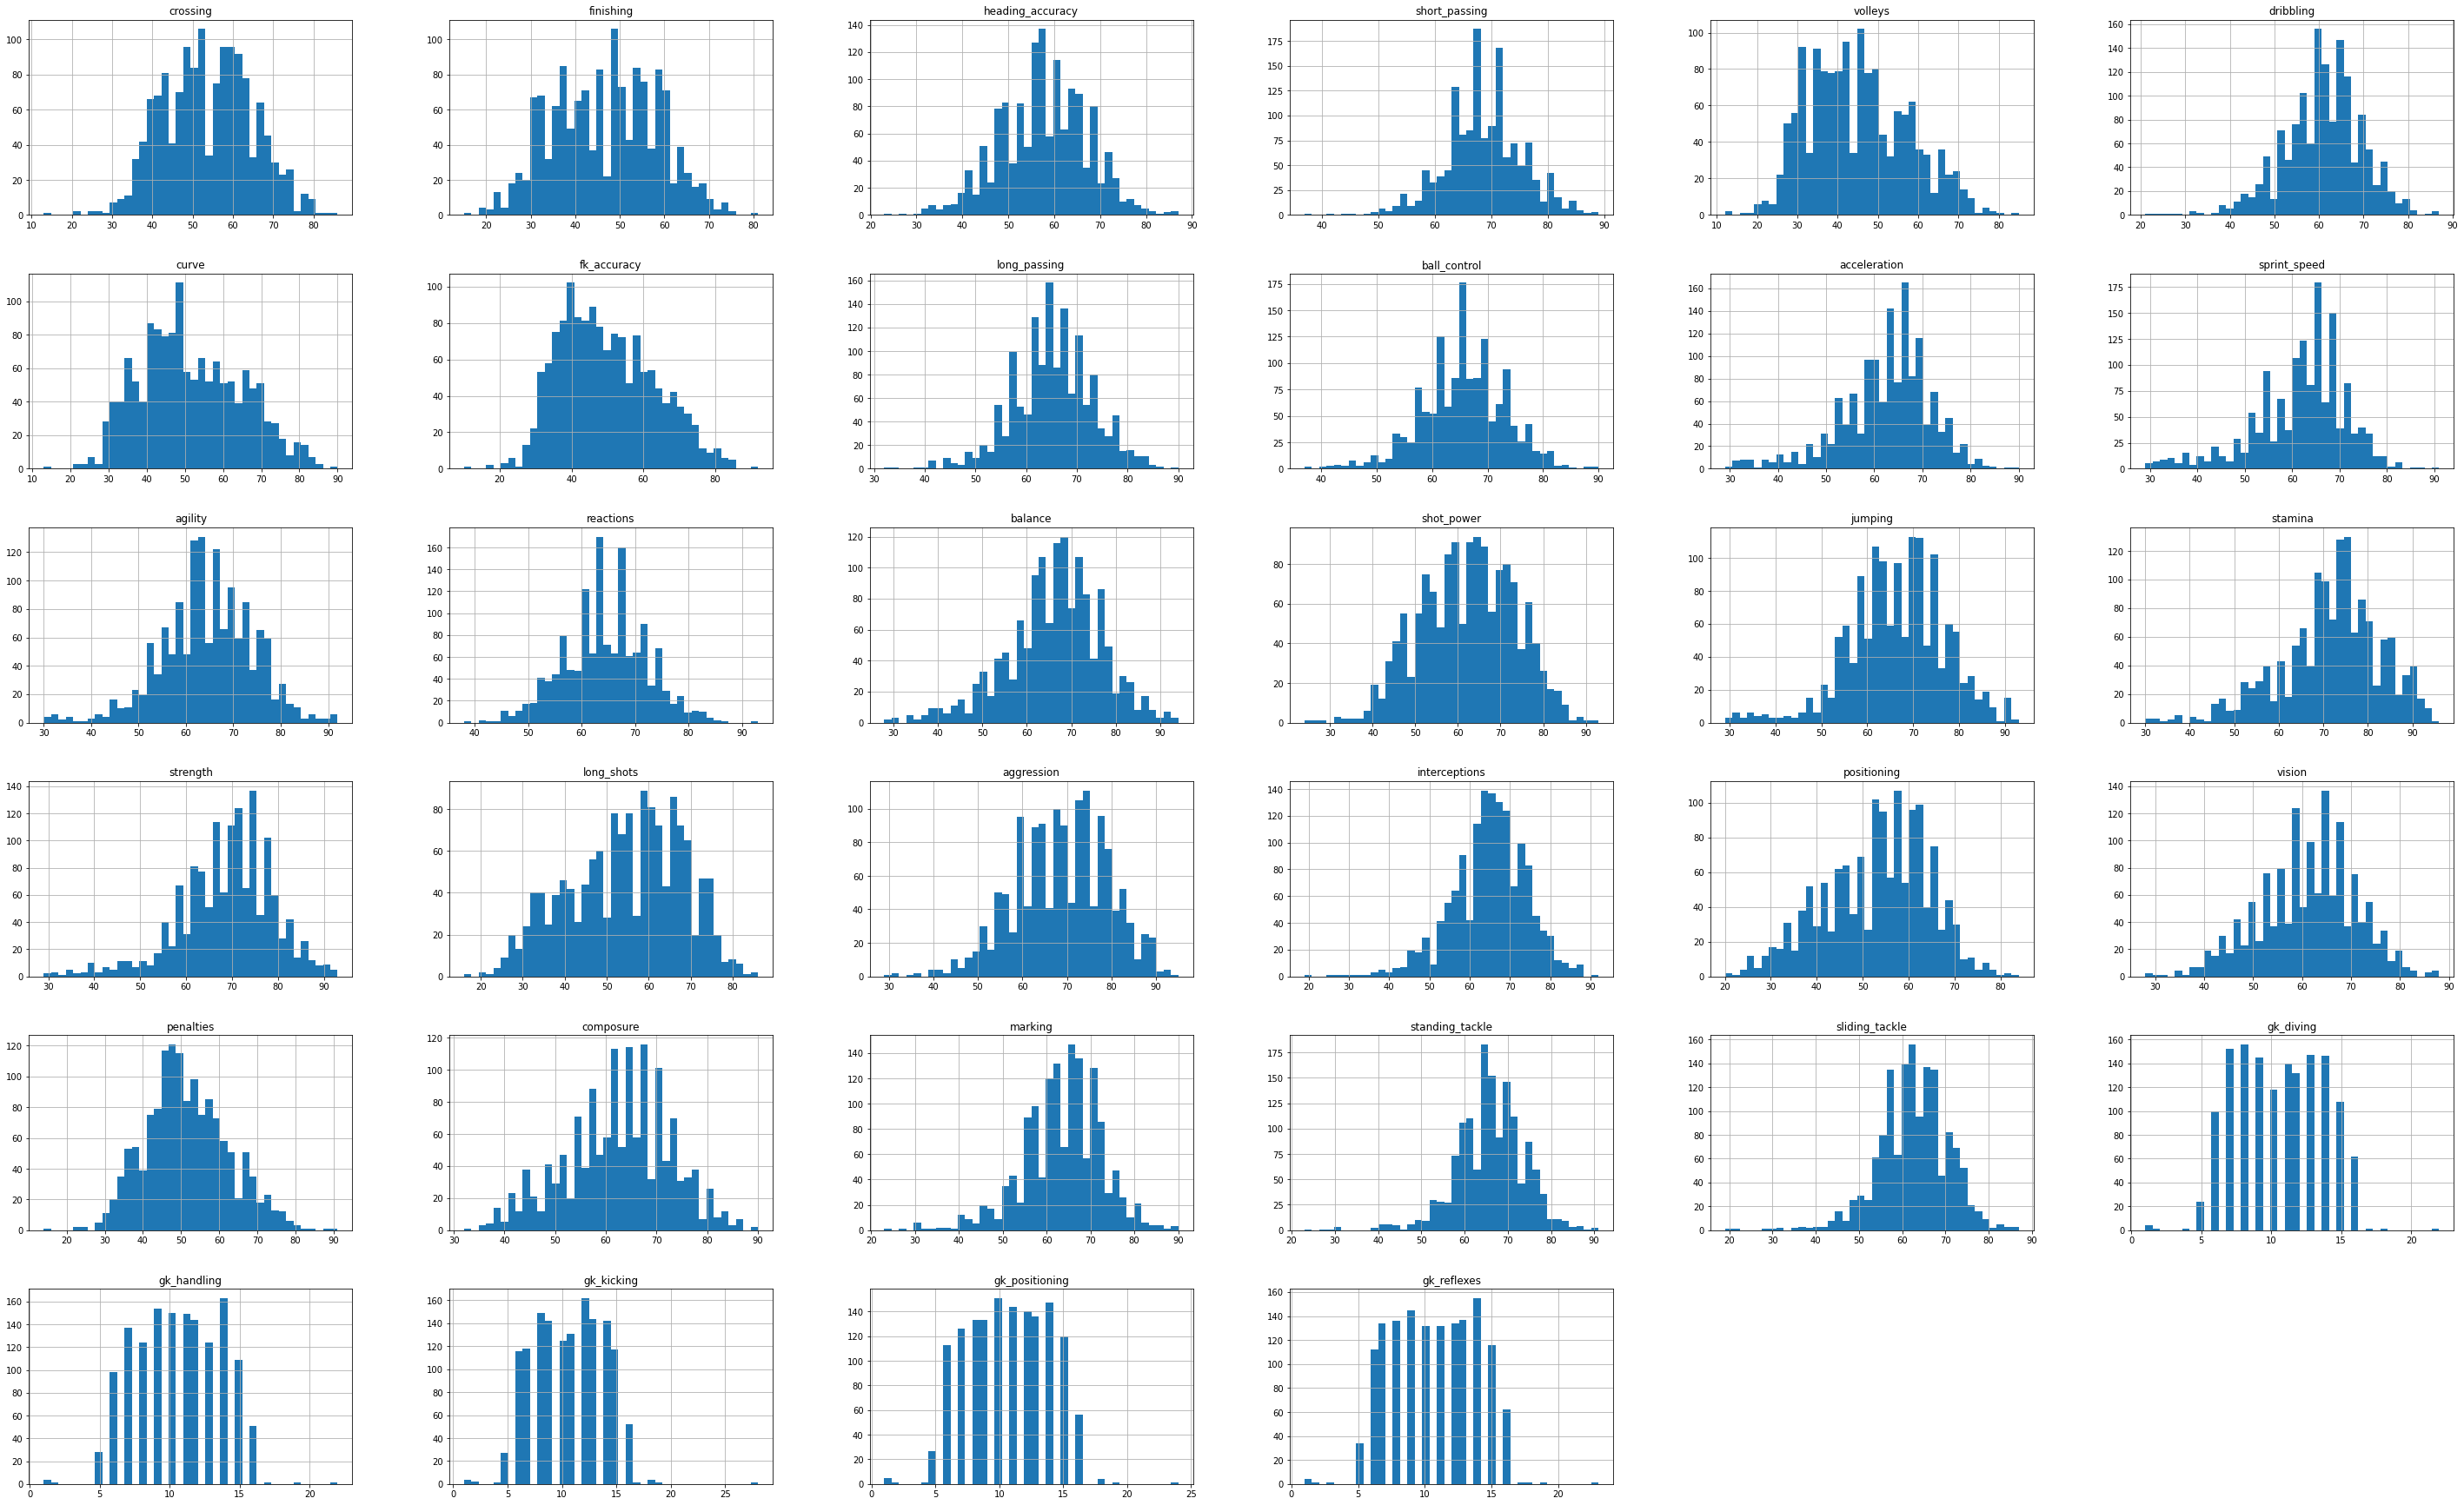

In [3]:
def_mid_fielders_df.drop(['rating', 'overall', 'potential'], axis = 1).hist(bins=40, figsize=(50,31))
plt.show()

In [4]:
def_mid_fielders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   overall           1439 non-null   int64 
 1   potential         1439 non-null   int64 
 2   field_position    1439 non-null   object
 3   height            1439 non-null   object
 4   weight            1439 non-null   object
 5   crossing          1439 non-null   int64 
 6   finishing         1439 non-null   int64 
 7   heading_accuracy  1439 non-null   int64 
 8   short_passing     1439 non-null   int64 
 9   volleys           1439 non-null   int64 
 10  dribbling         1439 non-null   int64 
 11  curve             1439 non-null   int64 
 12  fk_accuracy       1439 non-null   int64 
 13  long_passing      1439 non-null   int64 
 14  ball_control      1439 non-null   int64 
 15  acceleration      1439 non-null   int64 
 16  sprint_speed      1439 non-null   int64 
 17  agility       

In [5]:
def_mid_fielders_df.isna().any()

overall             False
potential           False
field_position      False
height              False
weight              False
crossing            False
finishing           False
heading_accuracy    False
short_passing       False
volleys             False
dribbling           False
curve               False
fk_accuracy         False
long_passing        False
ball_control        False
acceleration        False
sprint_speed        False
agility             False
reactions           False
balance             False
shot_power          False
jumping             False
stamina             False
strength            False
long_shots          False
aggression          False
interceptions       False
positioning         False
vision              False
penalties           False
composure           False
marking             False
standing_tackle     False
sliding_tackle      False
gk_diving           False
gk_handling         False
gk_kicking          False
gk_positioning      False
gk_reflexes 

In [6]:
list(def_mid_fielders_df)

['overall',
 'potential',
 'field_position',
 'height',
 'weight',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rating']

In [7]:
# Define Columns we will include
columns = ['field_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking',
    'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rating']

# Fit columns into df
def_mid_fielders_df = def_mid_fielders_df[columns]

#Print df
def_mid_fielders_df

,field_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,LDM,68,65,54,86,56,79,49,49,81,...,85,90,91,85,15,12,10,7,10,89
1,CDM,62,67,68,89,44,80,66,68,82,...,90,90,86,80,5,8,13,9,13,89
2,CDM,52,59,76,85,53,69,59,74,82,...,84,88,90,87,13,14,16,12,12,89
3,RDM,80,73,73,86,85,87,84,82,90,...,87,66,70,68,5,6,2,4,3,89
4,CDM,80,60,60,89,72,86,86,92,85,...,86,75,74,70,7,7,13,7,8,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,CDM,32,28,40,53,33,48,39,34,42,...,37,62,40,49,8,12,8,12,5,57
1435,LDM,52,29,41,50,30,45,41,32,44,...,39,52,40,49,8,15,11,8,5,53
1436,CDM,38,39,40,53,25,45,34,35,47,...,44,46,45,46,6,8,12,13,8,55
1437,CDM,35,33,44,55,27,42,37,38,44,...,38,44,42,46,9,15,15,8,6,56


In [8]:
#Create train_set and test_set
train_set, test_set = train_test_split(def_mid_fielders_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(def_mid_fielders_df))


target_train = train_set['rating'].values.ravel()
train_set = train_set.drop(['rating'], axis = 1)


Length of training data: 1151
Length of testing data: 288
Length of total data: 1439


In [9]:
for position_value in def_mid_fielders_df['field_position'].unique():
    
    corr_matrix = def_mid_fielders_df[def_mid_fielders_df['field_position'] == position_value].corr()['rating'].to_frame()
    temp_df = corr_matrix['rating'].sort_values(ascending=False)
    
    print(f'********** Current Position: {position_value}: \n ')
    
    print(temp_df)
    
    print('\n')

    print(f'-------------------------------------------------------------')
    
    print('\n')


********** Current Position: LDM: 
 
rating              1.000000
short_passing       0.797597
ball_control        0.773098
reactions           0.769139
long_passing        0.720112
composure           0.713946
interceptions       0.654594
dribbling           0.653900
standing_tackle     0.605046
vision              0.591121
shot_power          0.475524
sliding_tackle      0.462177
long_shots          0.440154
marking             0.433715
positioning         0.409506
curve               0.396739
volleys             0.394026
finishing           0.393863
crossing            0.390618
aggression          0.385809
heading_accuracy    0.378138
stamina             0.354983
fk_accuracy         0.313433
penalties           0.272497
agility             0.271620
acceleration        0.244074
sprint_speed        0.224883
balance             0.163606
strength            0.147915
jumping             0.124568
gk_diving           0.065993
gk_handling         0.046665
gk_kicking          0.028946
gk_ref

In [10]:
    
for position in def_mid_fielders_df['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = def_mid_fielders_df[def_mid_fielders_df['field_position'] == position]
        #temp_df = temp_df.dropna()

        #print(temp_df)
        # Find correlations
        temp_corr = def_mid_fielders_df[def_mid_fielders_df['field_position'] == position].corr()['rating'].to_frame()
        temp_corr = temp_corr[temp_corr['rating'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['rating']
        train_set = train_set.drop(['rating'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set)

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

 ********* Current Position: LDM: 
 
 ********* Significant features in order of impact: Index(['const', 'short_passing', 'reactions', 'ball_control',
       'standing_tackle', 'dribbling', 'vision'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     86.28
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           3.13e-61
Time:                        20:48:04   Log-Likelihood:                -437.80
No. Observations:                 194   AIC:                             895.6
Df Residuals:                     184   BIC:                             928.3
Df Model:                           9                                         
Covariance Type:            nonrobust                         